## Synthetic Model
Creating and testing a Sequence to Sequence Model on the Synthetic data using CTC Loss. 

### Setup

In [1]:
import pandas as pd

import os

# Changing directory to where everything is stored
os.chdir(r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code")

dataset = pd.read_pickle("synth_dataset.pkl")
dataset.head()

,Squiggle,Bases,read_id,Motifs
0,"[509, 509, 492, 507, 493, 498, 484, 495, 494, ...",CTAAGCTACGATCATCGCAAGCTTAGACAGTCTAGCTCGTACGTTC...,S1_1!seq_3782!10032!13101!-,7064499647480989982503691708864342736221395068...
1,"[503, 503, 491, 495, 493, 499, 497, 496, 489, ...",TCGAGTACCGAATCTGGTAAGCTACGATCATCGCAAGCTTAGACAT...,S1_10!seq_3782!20576!31513!-,6780778990100936425515037039275516771585374937...
2,"[466, 457, 460, 454, 459, 462, 459, 464, 472, ...",TGAAGCTGACTATGAGGTCTGCCTTACACAAGTCGTCTCGTTGCAT...,S1_100!seq_3782!23371!37737!+,3442889120067265698264494267153806625359098774...
3,"[433, 430, 445, 428, 432, 433, 434, 434, 437, ...",AGATCGTCAGCTTCAGTCTAGCTCGTACGTTCGACTATGAGGTCTG...,S1_1000!seq_3782!60406!83359!+,0375880578666488625417841725459385174412201173...
4,"[373, 376, 378, 381, 385, 386, 378, 375, 381, ...",CGAATCTGGTAAGCTATCCAGTAGATCGTCAGCTTCAAGTCGTCTC...,S1_1001!seq_3782!34624!38397!-,5470577790954764452442925325214768421237927304...


In [2]:
motif_choices = [
    "AGTCTAGCTCGTACGTTCGA",
    "TGGCACTCATCAATCCGTAT",
    "GACTTGCAATCGCTAAGCTA",
    "CTATGAGGTCTGCCTTACAC",
    "AAGTCGTCTCGTTGCATCGA",
    "TCCAGTAGATCGTCAGCTTC",
    "GTACCGAATCTGGTAAGCTA",
    "CGATCATCGCAAGCTTAGAC",
    "ATTCGTCGAACATGCTTCCA",
    "GCTACTCGACTTGAAGCTGA"
]

### Squiggle Values per motif

In [20]:
## Number of Squiggles Per motif
squiggles = dataset['Squiggle'].to_numpy()
bases = dataset['Bases'].to_numpy()
motifs = dataset['Motifs'].to_numpy()

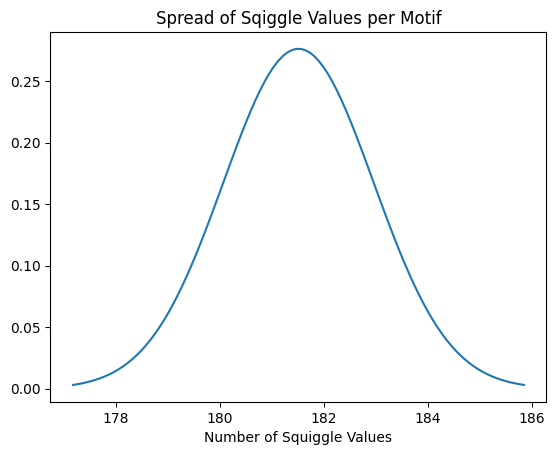

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

squiggles_per_motif = []

for i in range(len(squiggles)):
    squiggles_per_motif.append(len(squiggles[i])/len(motifs[i]))

mean_squiggle = np.mean(squiggles_per_motif)
std_squiggle = np.std(squiggles_per_motif)

mu, sigma = mean_squiggle, std_squiggle

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Spread of Sqiggle Values per Motif")
plt.xlabel("Number of Squiggle Values")
plt.show()

In [33]:
max(squiggles_per_motif)

195.53333333333333

In [34]:
min(squiggles_per_motif)

166.15

That means our window size can be 200 with an overlap of 40

### Spectrograpm
To use CNN, can convert the Squiggle into a Spectogram in order to use the 2D/3D nature of the CNNs that take advantage of adjacent pixels

In [3]:
squiggle_example = dataset['Squiggle'][0]
squiggle_example

array([509, 509, 492, ..., 534, 554, 549], dtype=int16)

In [4]:
squiggle_example = [i/len(squiggle_example) for i in squiggle_example]

In [5]:
len(squiggle_example)

27257

In [6]:
squiggle_example

[0.018674102065524452,
 0.018674102065524452,
 0.018050409069229924,
 0.018600726418901568,
 0.018087096892541364,
 0.01827053600909858,
 0.01775690648273838,
 0.018160472539164252,
 0.018123784715852808,
 0.018050409069229924,
 0.017977033422607036,
 0.017683530836115492,
 0.017866969952672708,
 0.017646843012804052,
 0.017866969952672708,
 0.01753677954286972,
 0.017830282129361264,
 0.01775690648273838,
 0.018050409069229924,
 0.01775690648273838,
 0.017830282129361264,
 0.01775690648273838,
 0.018380599479032908,
 0.018380599479032908,
 0.018600726418901568,
 0.018600726418901568,
 0.018417287302344352,
 0.018343911655721468,
 0.018490662948967236,
 0.01878416553545878,
 0.018417287302344352,
 0.018600726418901568,
 0.018564038595590124,
 0.01878416553545878,
 0.018453975125655796,
 0.018453975125655796,
 0.018710789888835896,
 0.020325054114539384,
 0.019884800234802068,
 0.02017830282129361,
 0.019738048941556296,
 0.02017830282129361,
 0.019958175881424955,
 0.020214990644605055

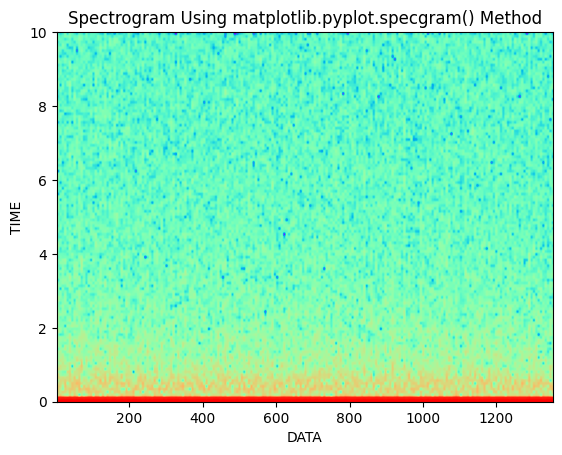

In [7]:
# Importing libraries using import keyword.
import math
import numpy as np
import matplotlib.pyplot as plt
 
# Set the time difference to take picture of
# the the generated signal.
Time_difference = 0.0001
 
# Generating an array of values
Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))
 
# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))
 
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(squiggle_example, Fs=20, cmap="rainbow")
 
# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()

In [8]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

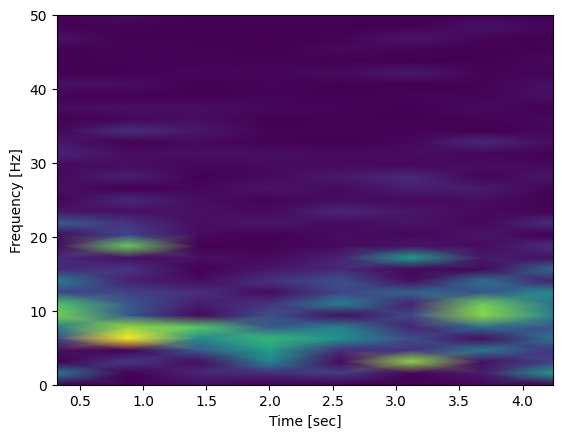

In [9]:
squiggle_example2 = np.array(squiggle_example)[1000:3000]
fs = 4e2
f, t, Sxx = signal.spectrogram(squiggle_example2, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,50)
plt.show()

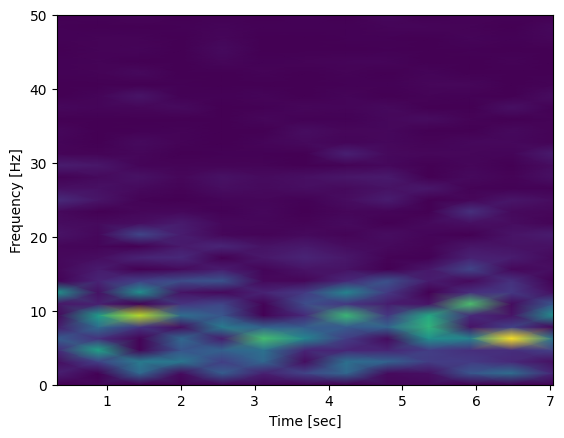

In [10]:
squiggle_example2 = np.array(squiggle_example)[3000:6000]
fs = 4e2
f, t, Sxx = signal.spectrogram(squiggle_example2, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,50)
plt.show()

## Defining the Model
Variable Input Shape CNN
Output for each time step (window) is a one of a (n+1) length probability array of which motif it was - so we don't need to fix the output length since we iterate over time steps

In [11]:
n_motifs = 8

Basically -input length needs to be specified - its the each time step, it can't be variable - so it should cover about 1.5 part of the signal that corresponds to a single motif (to be safe) and then the output is just a probability array for each time step as to which one it is and that is put together to get the final sequence. Lovely.
So each signal itself will be chopped up to be fed into the RNN and then the aggregated loss is backpropped as a whole for the whole sequence. Interesting. Let's learn some CNN math and make sure we understand this properly

In [12]:

def cnn_rnn_model(input_dim, filters, kernel_size, conv_stride,
    conv_border_mode, units, output_dim=n_motifs+1):
    """ Build a recurrent + convolutional network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))

    # need to actually understand what is happening in 1D Convolution though...
    Convolution1D(input_shape(1, None, None))
    
    # Add convolutional layer
    conv_1d = Conv1D(filters, kernel_size, 
                     strides=conv_stride, 
                     padding=conv_border_mode,
                     activation='relu',
                     name='conv1d')(input_data)
    # Add batch normalization
    bn_cnn = BatchNormalization(name='bn_conv_1d')(conv_1d)
    # Add a recurrent layer
    simp_rnn = GRU(units, activation='relu',
        return_sequences=True, implementation=2, name='rnn')(bn_cnn)
    # TODO: Add batch normalization
    bn_rnn = BatchNormalization(name='bn_rnn_1d')(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    print(model.summary())
    return model

So I am going to chop sequences up with a window size that I determine using some method (right now thinking about 1-2 seconds worth of data, which corresponds to about 8000 values, with an overlap of about 500, which means that there will be upto 50 forward passes that accumulate together to create the final tensor that the loss is backprogpogated towards. I'm going to use the spectograph for now (without cleaning - even though I know there is a decent amount of noise there) just to see how the model trains. I'm pretty confident I will have to use shorter reads, but I need to just get started basically, so let's have something in place. 

In [19]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

def create_spectograph(squiggle):
    """Create Spectograph from squiggle and returns spectograph to be fed into model. Always returns the same output size to maintain consistency"""
    fs = 4e2
    f, t, Sxx = signal.spectrogram(squiggle_example2, fs)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0,50)
    plt.show()

window_size = 8000
overlap_size = 500
X = dataset['Squiggle'].to_numpy()

for squiggle in X[:1]:
    batch_squiggle = []
    len_squiggle = len(squiggle)
    ptr = 0

    # Creating batched squiggle to be fed into model
    while ptr + 8000 <= len_squiggle:
        batch_squiggle.append(squiggle[ptr:ptr+8000]) 
        ptr+=7500 # Setting overlapping window

    if ptr < len_squiggle:
        pad = np.zeros(8000 - (len_squiggle-ptr))
        tmp = squiggle[ptr:-1]
        print(len(tmp))
        tmp = np.concatenate(tmp, pad)
        print(len(tmp))
        batch_squiggle.append(tmp)
        

    # Creating spectograph
    


4756


TypeError: only integer scalar arrays can be converted to a scalar index

### Defining Model

From our Squiggles  per motif analysis, we have determined a window size of 200 with an overlap of 50. That means at each time step we can be pretty sure we have limited ourselves to about one base. How fast that is, only god can tell.

In [48]:

import torch
import torch.nn as nn

window_size = 200 # Length of sequnce fed into model (corresponding to a squiggle length for a single motif)
window_step = 150 # Allowing for an overlap to capture dependencies
overlap_frames = 50
n_motifs = 10 # Determining model output size as n_motifs + 1 by adding the blank token

class CNN_BiGRU_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.2):
        super(CNN_BiGRU_Classifier, self).__init__()

        # CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, padding=1)
        self.norm1 = nn.LayerNorm(32)
        self.drop1 = nn.Dropout(dropout_rate)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.norm2 = nn.LayerNorm(64)
        self.drop2 = nn.Dropout(dropout_rate)

        # Fully connected layer
        self.fc = nn.Linear(64, hidden_size)

        # Bidirectional GRU layers
        self.bigru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout_rate)

        # Sequence classifier
        self.output = nn.Linear(hidden_size * 2, output_size)

        self.hidden_size = hidden_size
        self.num_layers = num_layers

    def forward(self, x):
        # Permute the input tensor to (batch_size, channels, sequence_length)

        # CNN layers
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.drop1(x)
        x = self.pool(x)

        # Apply LayerNorm after permuting the dimensions
        #x = x.permute(0, 2, 1)
        #x = self.norm1(x)

        x = self.conv2(x)
        #x = self.norm2(x)
        x = torch.relu(x)
        x = self.drop2(x)

        # Fully connected layer
        x = x.permute(0, 2, 1)
        x = self.fc(x)
        x = torch.relu(x)

        # Bidirectional GRU layers
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size)
        x, _ = self.bigru(x, h0)

        # Output layer
        x = self.output(x)
        x = torch.sigmoid(x)

        # Summing across sequence length - btw this can be used for aligning as well
        x = x.sum(dim=1)

        return x

# Example usage
input_size = 1  # Number of input channels
hidden_size = 128
num_layers = 3
output_size = n_motifs + 1 # Number of output classes
dropout_rate = 0.2

model = CNN_BiGRU_Classifier(input_size, hidden_size, num_layers, output_size, dropout_rate)
# Define the input tensor
sequence_length = window_size
batch_size = 1
input_size = 1
input_array = torch.randn(sequence_length)  # (sequence_length)

# Reshape the input array into a 3D tensor
input_tensor = input_array.view(batch_size, input_size, sequence_length)
output = model(input_tensor)
print(output)

tensor([[51.2006, 50.4799, 48.4119, 49.7373, 48.7443, 51.5181, 52.6082, 48.5087,
         49.8513, 50.8795, 48.9427]], grad_fn=<SumBackward1>)


### Training Loop

In [ ]:
predictions = []
targets = []

def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text


for batch in self.dataset:
    X,y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions) # That is the Dynamic Programming thing I suppose
    for label in y:
        label = (
            tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        )
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 2):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)